# _____RNN-Start Learning RNN_ 

In [1]:
from pandas import read_csv 
import numpy as np

## Load the dataset and selecting only the useful column

In [2]:
df = read_csv('/home/mirkalim/Documents/Python/Practice/train data/international-airline-passengers.csv', usecols=[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [3]:
values = df.values.astype('float32') #I am going to fetch these values out of the dataframe
values.shape

(144, 1)

## Divide this data into train and test

In [4]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

In [5]:
from sklearn.preprocessing import MinMaxScaler   #Scaling
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

## Create the dataset format into sequences(time frames of size (let say-12))

In [6]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):#iterating over each datapoint(no.of datapoint-incase of train data: 96-12=84)
        x = data[i:i + k, 0]  #84 datapoints-each includes 12 entries(0-11, 1-12, 2-13, .......) (i: i+12)
        y = data[i + k, 0]    #84 datapoints-each includes 13th entry of each iteration in 84 (12, 13, 14, 15, ..... )   (i+12)
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [7]:
look_back = 12  # no.of sequences in each datapoint
trainX, trainY = create_dataset(train, look_back) 
testX, testY = create_dataset(test, look_back)

In [8]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape  #shape- (no. of datapoints, no. of sequences, no. of features in each entry of every sequences)

(84, 12, 1)

In [11]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# _____Training the Model_

## Forward and Backward Propagation - optimizing and getting optimal weights at minimal cost

In [12]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(look_back, 1)))  #inp_ shape = (no. of sequences, no. of features )
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size = 1)

Epoch 1/10
84/84 [==============================] - 2s 23ms/step - loss: 0.0562
Epoch 2/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0212
Epoch 3/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0123
Epoch 4/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0093
Epoch 5/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0087
Epoch 6/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0075
Epoch 7/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0067
Epoch 8/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0067
Epoch 9/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0067
Epoch 10/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0069


# Predictions

In [13]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()  #unscale and reshape it to 1D using ravel

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape, testTrue.shape

((36,), (36,))

# Plotting

In [14]:
from matplotlib import pyplot as plt

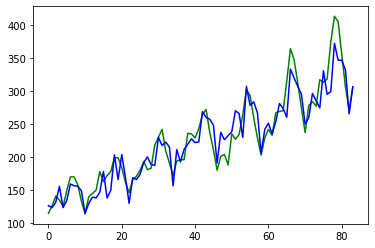

In [15]:
#Plotting the train data and comparing with the true values
plt.plot(trainTrue, c = 'g')    
plt.plot(trainPredict, c = 'b')
plt.show()

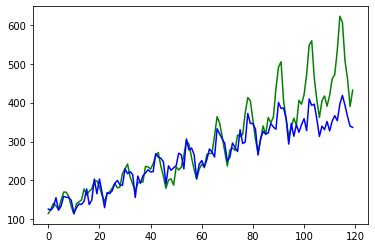

In [16]:
#Plotting both combined together train and test data and comparing with true values
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()